## Stock Market Forcasting Case study 

### In this case study I have took 4 stocks from US Stock market i.e Apple,Microsoft,Tesla and Walmart , and done forcasting to decide on which stock I should make my heavy investment with which i can get good returns and ignore the loss   

#### Steps for solving the case study 
- Importing the necessary library 
- Importing the dataset of all stocks
- Cleaning the dataset :
    - Filling the  missing values 
    - handling outliers 
- Adding required columns 
- Exploratory data analysis 
- Candlestick View visualization 
- Forcasting of stocks with RMSE and MAPE by :
    - Simple moving average method 
    - Holt's exponential smoothing method
    - Holt Winters' additive method
- Deriving cumulative returns of stock 
- Result of forcasting -"which stock we should go with"

### Importing the necessary library

In [199]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Importing the dataset of all stocks

In [2]:
# import apple dataset 
apple = pd.read_csv("apple.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1,15-12-1980,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
2,16-12-1980,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
3,17-12-1980,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
4,18-12-1980,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0


In [3]:
#lets us check the shape and null values 
apple.shape

(9909, 7)

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9904 non-null   float64
 2   High       9903 non-null   float64
 3   Low        9904 non-null   float64
 4   Close      9906 non-null   float64
 5   Adj Close  9906 non-null   float64
 6   Volume     9907 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.0+ KB


In [5]:
apple.isnull().sum()

Date         0
Open         5
High         6
Low          5
Close        3
Adj Close    3
Volume       2
dtype: int64

In [6]:
#lets import microsoft data 
microsoft = pd.read_csv("microsoft.csv")
microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-2013,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,04-11-2013,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,05-11-2013,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,06-11-2013,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,07-11-2013,36.799999,36.799999,34.119999,35.310001,33.007175,883700


In [7]:
#lets us check the shape and null values 
microsoft.shape

(1614, 7)

In [8]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1614 non-null   object 
 1   Open       1608 non-null   float64
 2   High       1611 non-null   float64
 3   Low        1609 non-null   float64
 4   Close      1611 non-null   float64
 5   Adj Close  1614 non-null   float64
 6   Volume     1614 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [9]:
microsoft.isnull().sum()

Date         0
Open         6
High         3
Low          5
Close        3
Adj Close    0
Volume       0
dtype: int64

In [10]:
#lets import tesla data 
tesla = pd.read_csv("tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-20,5.250,5.250,4.175,4.175,4.175,35000
1,2018-11-21,4.595,6.085,4.595,5.295,5.295,15600
2,2018-11-23,5.500,5.500,4.895,4.900,4.900,6000
3,2018-11-26,4.850,4.850,3.880,4.190,4.190,10000
4,2018-11-27,4.400,4.500,4.250,4.480,4.480,8800


In [11]:
#lets us check the shape and null values 
tesla.shape

(342, 7)

In [12]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       342 non-null    object 
 1   Open       342 non-null    float64
 2   High       342 non-null    float64
 3   Low        342 non-null    float64
 4   Close      342 non-null    float64
 5   Adj Close  342 non-null    float64
 6   Volume     342 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.8+ KB


In [13]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
#lets import walmart data 
walmart = pd.read_csv("walmart.csv")
walmart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-12-1981,3.437749,3.507907,3.367591,3.414363,0.027124,521800.0
1,04-01-1982,3.414363,3.429954,3.383182,3.429954,0.027248,224400.0
2,05-01-1982,3.305228,3.398773,3.196094,3.274047,0.026009,686200.0
3,06-01-1982,3.227275,3.274047,3.180503,3.180503,0.025266,1118300.0
4,07-01-1982,3.164912,3.227275,3.086959,3.164912,0.025142,831300.0


In [15]:
#lets us check the shape and null values 
walmart.shape

(9646, 7)

In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9646 non-null   object 
 1   Open       9636 non-null   float64
 2   High       9643 non-null   float64
 3   Low        9635 non-null   float64
 4   Close      9641 non-null   float64
 5   Adj Close  9644 non-null   float64
 6   Volume     9644 non-null   float64
dtypes: float64(6), object(1)
memory usage: 527.6+ KB


In [17]:
walmart.isnull().sum()

Date          0
Open         10
High          3
Low          11
Close         5
Adj Close     2
Volume        2
dtype: int64

As you see there is one missing value in dataset except tesla 
we will handle this missing value

### Cleaning the dataset

We will use linear interpolation  method for handling the missing values, 
 Linear interpolation is basically the estimation of an unknown value that falls within two known values

In [19]:
apple = apple.interpolate(method='linear')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1,15-12-1980,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
2,16-12-1980,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
3,17-12-1980,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
4,18-12-1980,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0


In [20]:
apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
microsoft = microsoft.interpolate(method='linear')
microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-2013,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,04-11-2013,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,05-11-2013,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,06-11-2013,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,07-11-2013,36.799999,36.799999,34.119999,35.310001,33.007175,883700


In [22]:
microsoft.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
walmart = walmart.interpolate(method='linear')
walmart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-12-1981,3.437749,3.507907,3.367591,3.414363,0.027124,521800.0
1,04-01-1982,3.414363,3.429954,3.383182,3.429954,0.027248,224400.0
2,05-01-1982,3.305228,3.398773,3.196094,3.274047,0.026009,686200.0
3,06-01-1982,3.227275,3.274047,3.180503,3.180503,0.025266,1118300.0
4,07-01-1982,3.164912,3.227275,3.086959,3.164912,0.025142,831300.0


In [24]:
walmart.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

we will add columns in dataset which shows us "average" of day in price and the difference of open price and close price ,market cap of organization  

 the average price of stock in a day is the mean value of high price and low price

In [25]:
apple["average"] = round((apple["High"]+ apple["Low"])/2, 3)
microsoft["average"] = round((microsoft["High"]+ microsoft["Low"])/2, 3)
tesla["average"] = round((tesla["High"]+ tesla["Low"])/2, 3)
walmart["average"] = round((walmart["High"]+ walmart["Low"])/2, 3)

the difference in price of stock in a day is difference between open price to close price 

In [26]:
apple["diff"] = round((apple["Open"]- apple["Close"]),3)
microsoft["diff"] = round((microsoft["Open"]- microsoft["Close"]),3)
tesla["diff"] = round((tesla["Open"]- tesla["Close"]),3)
walmart["diff"] = round((walmart["Open"]- walmart["Close"]),3)

for us to understand how profitable a company is, we need to get an idea about its market cap.the market cap of organization is multiplying volume of stocks to open price 

In [33]:
apple["market_cap"] = round((apple["Open"]*apple["Volume"]),1)
microsoft["market_cap"] = round((microsoft["Open"]*microsoft["Volume"]),1)
tesla["market_cap"] = round((tesla["Open"]*tesla["Volume"]),1)
walmart["market_cap"] = round((walmart["Open"]*walmart["Volume"]),1)

Lets make Date column in same format and make it a index column 

here tesla date format is in perfect order but it is in object type , we will make all the stocks date in similar type and perfect order, and make it a index column

In [29]:

microsoft["Date"]= pd.to_datetime(microsoft["Date"],format='%d-%m-%Y')
apple["Date"]= pd.to_datetime(apple["Date"],format='%d-%m-%Y')
tesla["Date"]= pd.to_datetime(tesla["Date"],format='%Y-%m-%d')
walmart["Date"]= pd.to_datetime(walmart["Date"],format='%d-%m-%Y')

In [30]:
apple.set_index("Date",inplace=True)
microsoft.set_index("Date",inplace=True)
tesla.set_index("Date",inplace=True)
walmart.set_index("Date",inplace=True)

### EDA

lets see the stock price trend of stocks 

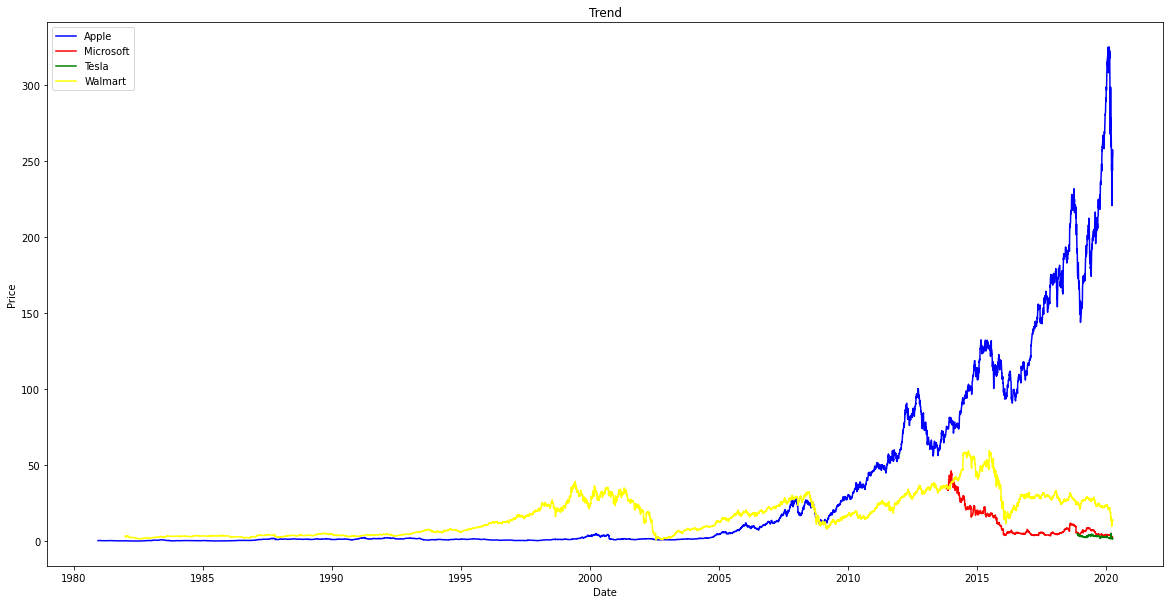

In [44]:
plt.figure(figsize=(20,10))
plt.plot(apple["average"], color='blue',label="Apple")
plt.plot(microsoft["average"], color='red',label="Microsoft")
plt.plot(tesla["average"], color='green',label="Tesla")
plt.plot(walmart["average"], color='yellow',label="Walmart")
plt.title("Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

Let us see the market cap of stocks 

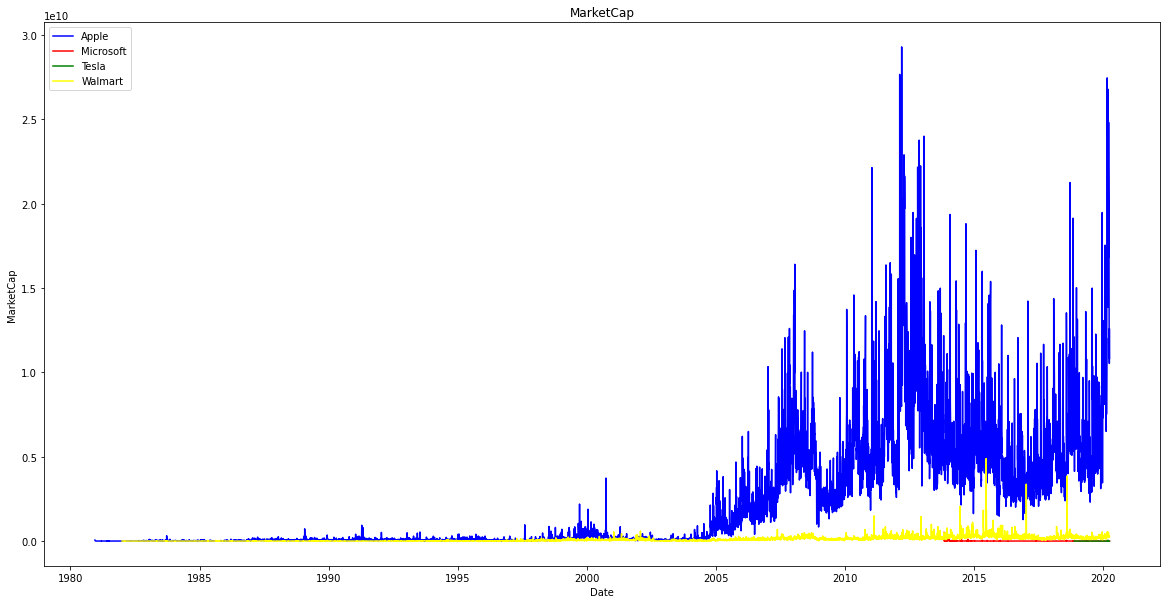

In [43]:
plt.figure(figsize=(20,10))
plt.plot(apple["market_cap"], color='blue',label="Apple")
plt.plot(microsoft["market_cap"], color='red',label="Microsoft")
plt.plot(tesla["market_cap"], color='green',label="Tesla")
plt.plot(walmart["market_cap"], color='yellow',label="Walmart")
plt.title("MarketCap")
plt.xlabel("Date")
plt.ylabel("MarketCap")
plt.legend(loc="best")
plt.show()

### Candlestick View visualization

In [45]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


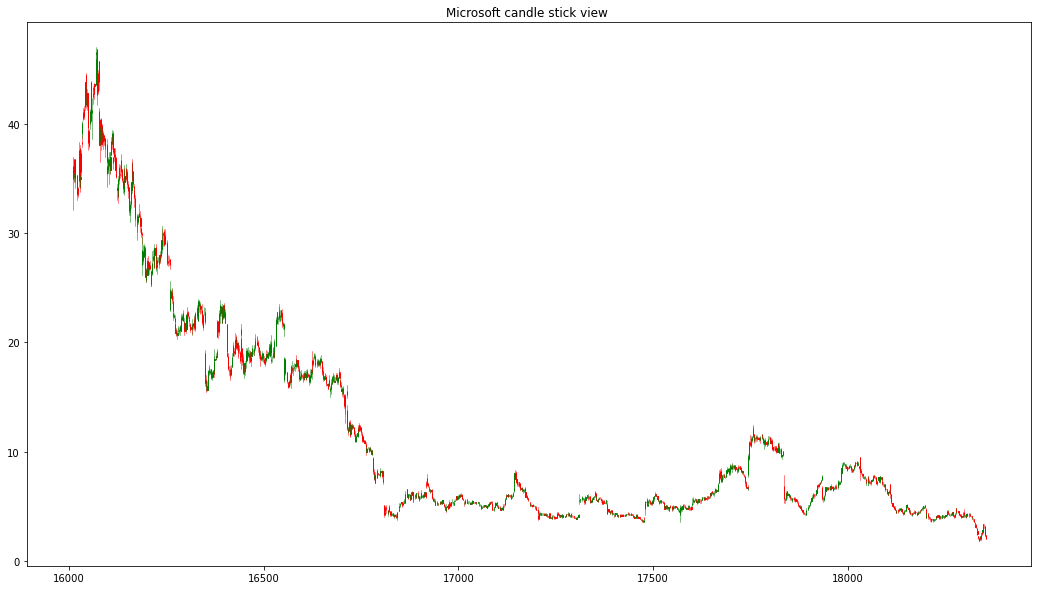

In [52]:
microsoft2=microsoft.copy(deep = True)
microsoft2 = microsoft2.reset_index()
microsoft2['date_ax'] = microsoft2['Date'].apply(lambda date: date2num(date))
microsoft2_values=[tuple(vals) for vals in microsoft2[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(18,10))
candlestick_ohlc(ax,microsoft2_values,width = 0.3, colorup='g',colordown='r')
plt.title("Microsoft candle stick view ")
plt.show()

above chart above shoes us the candlestick view i.e the gain and loss of microsoft stock in day

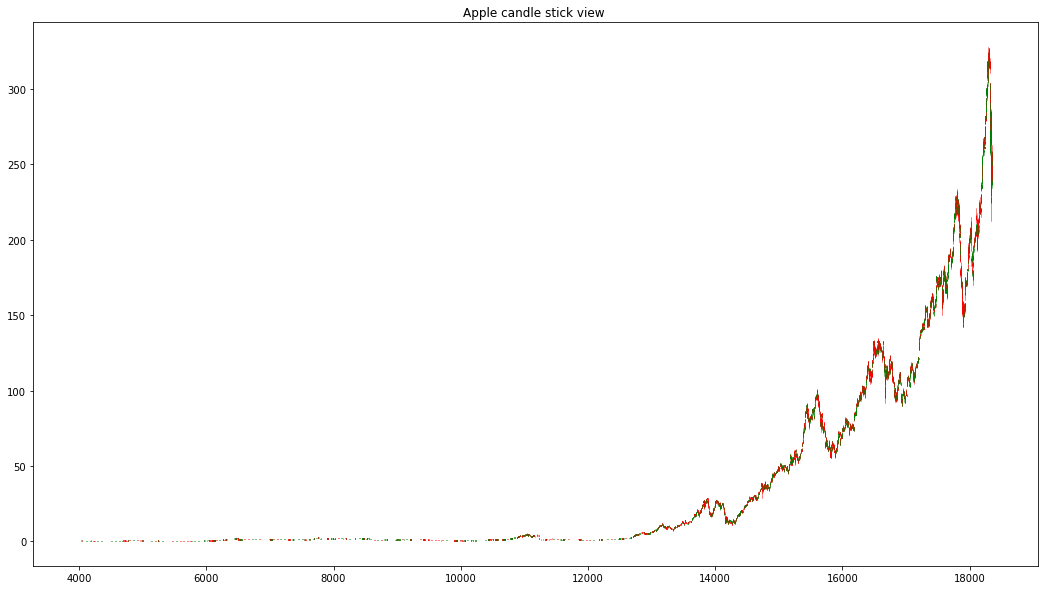

In [53]:
apple2=apple.copy(deep = True)
apple2 = apple2.reset_index()
#apple2 = apple2.loc["1980-12":"1981-04"]
#when you need to see the trend of specific months 
apple2['date_ax'] = apple2['Date'].apply(lambda date: date2num(date))
apple2_values=[tuple(vals) for vals in apple2[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(18,10))
candlestick_ohlc(ax,apple2_values,width = 0.3, colorup='g',colordown='r')
plt.title("Apple candle stick view ")
plt.show()

above chart above shoes us the candlestick view i.e the gain and loss of apple stock in day

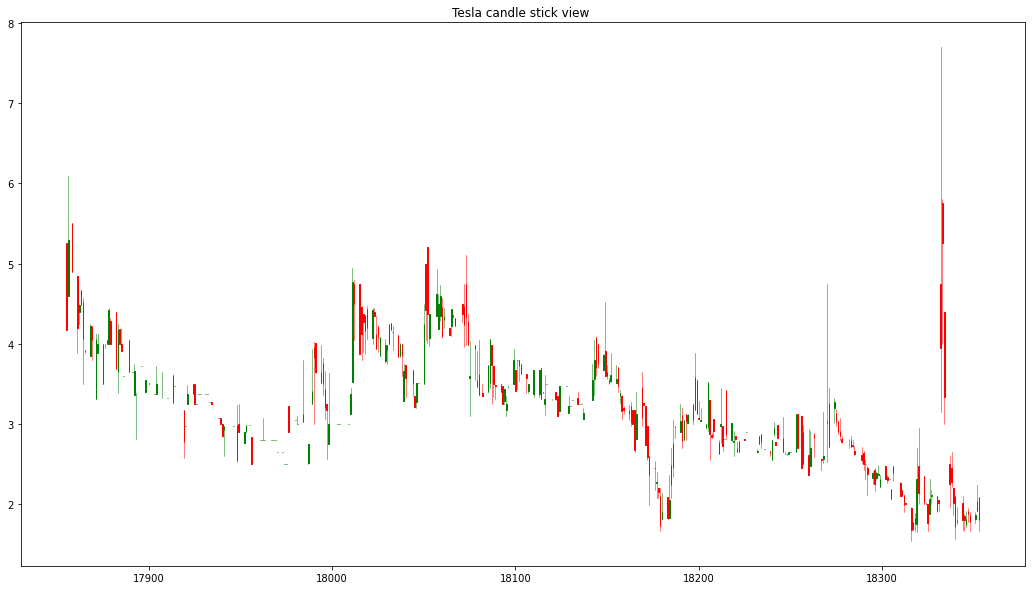

In [56]:
tesla2=tesla.copy(deep = True)
tesla2 = tesla2.reset_index()
#tesla2 = tesla2.iloc[299: ,0:]
#for selecting values in particular range 
tesla2['date_ax'] = tesla2['Date'].apply(lambda date: date2num(date))
tesla2_values=[tuple(vals) for vals in tesla2[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(18,10))
candlestick_ohlc(ax,tesla2_values,width = 0.3, colorup='g',colordown='r')
plt.title("Tesla candle stick view ")
plt.show()

above chart above shoes us the candlestick view i.e the gain and loss of tesla stock in day

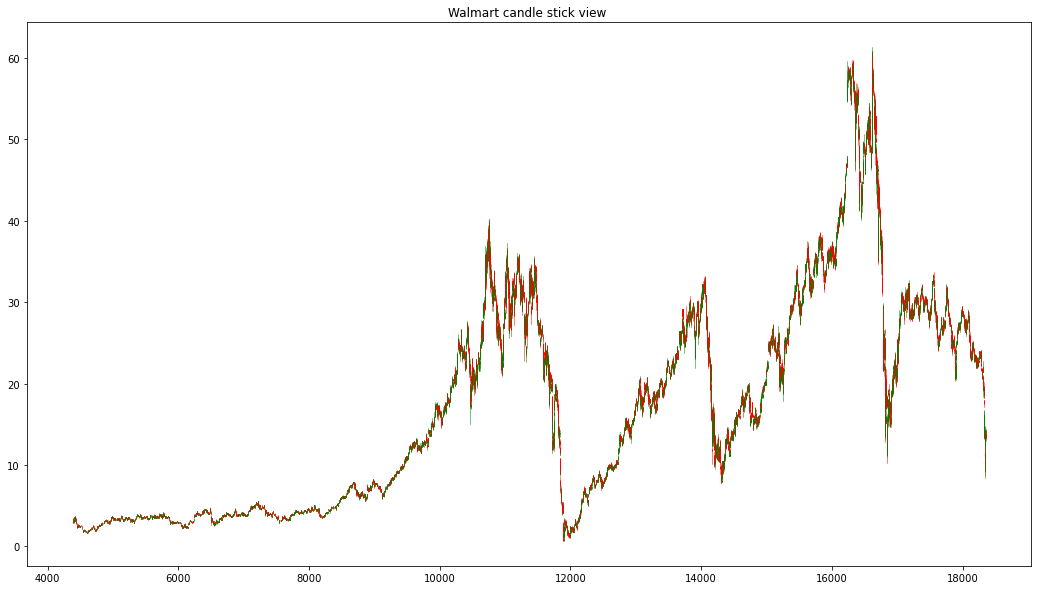

In [57]:
walmart2=walmart.copy(deep = True)
walmart2 = walmart2.reset_index()
#walmart2 = walmart2.tail(100)
#when you want to watch the latest trend of a stock
walmart2['date_ax'] = walmart2['Date'].apply(lambda date: date2num(date))
walmart2_values=[tuple(vals) for vals in walmart2[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(18,10))
candlestick_ohlc(ax,walmart2_values,width = 0.3, colorup='g',colordown='r')
plt.title("Walmart candle stick view ")
plt.show()

above chart above shoes us the candlestick view i.e the gain and loss of walmart stock in day

### Forcasting of stocks

#### From the above data plotting you can see 
- apple and walmart stock seems to be more promising because of their upward trend
- tesla stock has a up and down variation 
- microsoft stock has downward variation 

Now lets start our forcasting for prediction of stock which will give us good returns

As a trader, we will take help of time series forcasting for further prediction to decide on which stock we should go for our heavy investment, we will use methods of forcasting i.e  
- Simple moving average forecast
- Holt's exponential smoothing method
- Holt Winters' additive method

We will calculate RSME(Root mean square error) and MAPE(Mean absolute percentage error) of the above forcast methods as well

we will also calculate the cumulative return of stock 

#### Apple forcasting 

In [60]:
#For apple we will use the recent 2 years prior values for forcasting 
apple_lat = apple.tail(730)
apple_lat.shape

(730, 10)

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/728494299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_lat['MA12'] = apple_lat['Open'].rolling(12).mean()


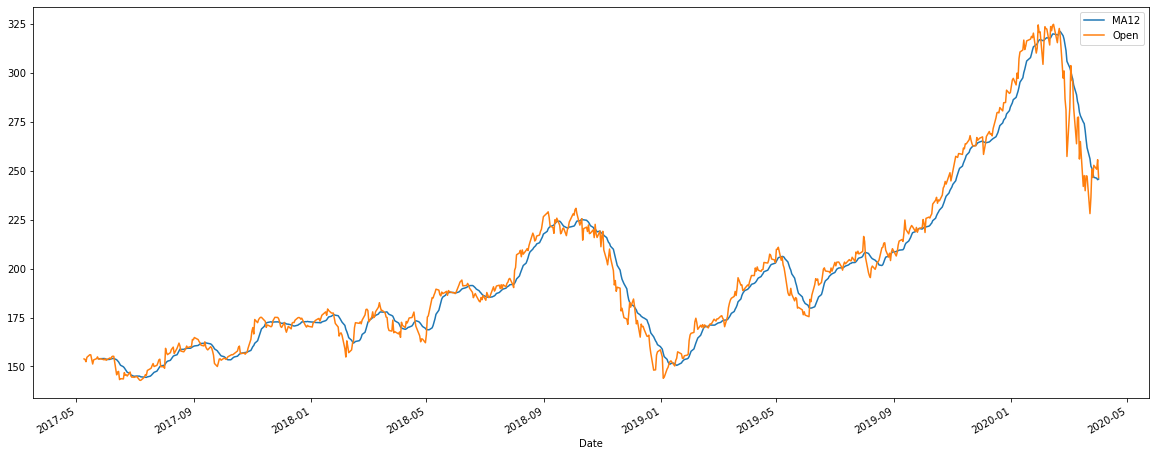

In [79]:
apple_lat['MA12'] = apple_lat['Open'].rolling(12).mean()
apple_lat['MA12'].plot(label='MA12',figsize=(20,8))
apple_lat['Open'].plot()
plt.legend(loc="best")

In [66]:
apple_train, apple_test = train_test_split(apple, train_size = 0.7, random_state = 42)

In [67]:
train_len1= 6936

In [88]:
y_hat_sma = apple.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = apple['Open'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len1:] = y_hat_sma['sma_forecast'][train_len1-1]

In [89]:
y_hat_sma['sma_forecast'].shape

(9909,)

In [114]:
rmse_apple =  np.sqrt(mean_squared_error(apple_test['Open'], y_hat_sma['sma_forecast'][train_len1:])).round(2)
mape_apple = np.round(np.mean(np.abs(apple_test['Open']-y_hat_sma['sma_forecast'][train_len1:])/apple_test['Open'])*100,2)

results_01 = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse_apple],'MAPE': [mape_apple] })
results_01 = results_01[['Method', 'RMSE', 'MAPE']]
results_01

,Method,RMSE,MAPE
0,Simple moving average forecast,58.38,65.91


In [97]:

model = ExponentialSmoothing(np.asarray(apple_train['average']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = apple_test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(apple_test))

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/1139480038.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 49.679, 'initial_trend': -48.014, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [115]:
rmse_apple = np.sqrt(mean_squared_error(apple_test['average'], y_hat_holt['holt_forecast'])).round(2)
mape_apple = np.round(np.mean(np.abs(apple_test['average']-y_hat_holt['holt_forecast'])/apple_test['average'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse_apple],'MAPE': [mape_apple] })
results_01 = pd.concat([results_01, tempResults])
results_01 = results_01[['Method', 'RMSE', 'MAPE']]
results_01

,Method,RMSE,MAPE
0,Simple moving average forecast,58.38,65.91
0,Holt's exponential smoothing method,427.14,25720.96


In [110]:
y_hat_hwa = apple_test.copy()
model = ExponentialSmoothing(np.asarray(apple_train['Open']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(2973)

{'smoothing_level': 0.04038598140949146, 'smoothing_trend': 0.01615512075548693, 'smoothing_seasonal': 0.06857063632218424, 'damping_trend': nan, 'initial_level': 34.47354429907057, 'initial_trend': 0.08481870640841516, 'initial_seasons': array([ 15.22887666, -32.81459132, 191.71133207, -33.48584446,
       -32.26875304,   7.19113712, -33.00491944,  65.53086969,
       -21.31986456, -32.16378555,  70.37886839, -28.45479162]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [116]:
rmse_apple = np.sqrt(mean_squared_error(apple_test['Open'], y_hat_hwa['hw_forecast'])).round(2)
mape_apple = np.round(np.mean(np.abs(apple_test['Open']-y_hat_hwa['hw_forecast'])/apple_test['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse_apple],'MAPE': [mape_apple] })
results_01 = pd.concat([results_01, tempResults])
results_01 = results_01[['Method', 'RMSE', 'MAPE']]
results_01

,Method,RMSE,MAPE
0,Simple moving average forecast,58.38,65.91
0,Holt's exponential smoothing method,427.14,25720.96
0,Holt Winters' additive method,362.38,21268.74


let us calculate the cumulative return of apple , The cumulative return is the total change in the investment price over a set time

for cumulative return we need to calculate the returns first 

#### rt = (pt / pt-1 )- 1
- rt is return
- pt is price at the end of day 

In [118]:
apple['returns'] = (apple['Close']/apple['Close'].shift(1))-1

#### cumulative return = 1 + returns

In [119]:
apple['cumulative return'] = (1+apple['returns']).cumprod()

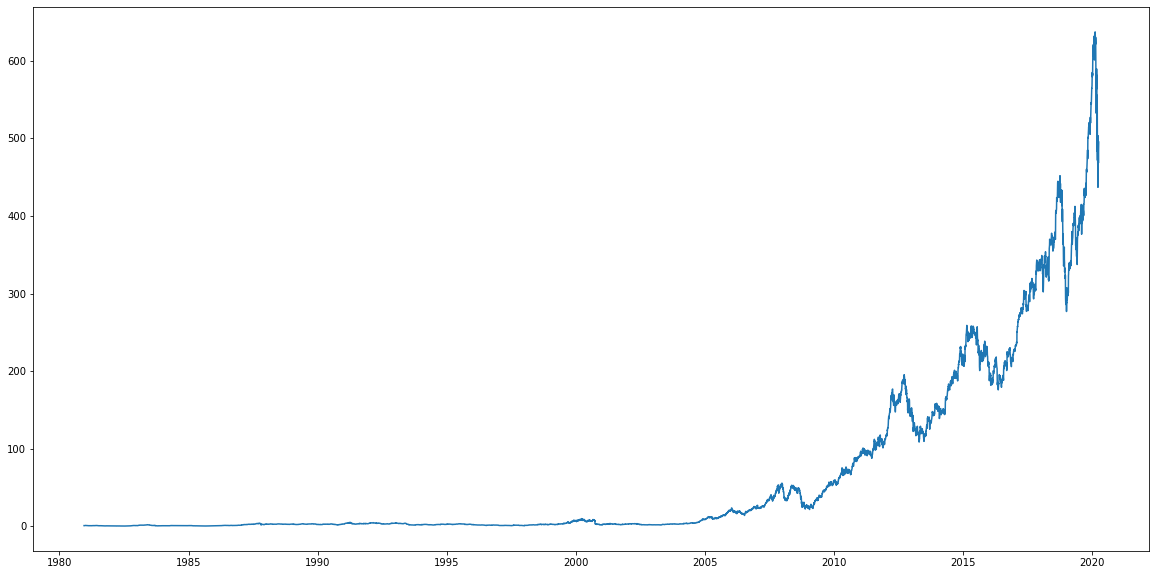

In [134]:
plt.figure(figsize=(20,10))
plt.plot(apple['cumulative return'])
plt.show()


#### Microsoft Forcasting 

In [136]:
#For microsoft we will use the recent 2 years prior values for forcasting 
microsoft_lat = microsoft.tail(730)
microsoft_lat.shape

(730, 9)

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/3125119971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft_lat['MA12'] = microsoft_lat['Open'].rolling(12).mean()


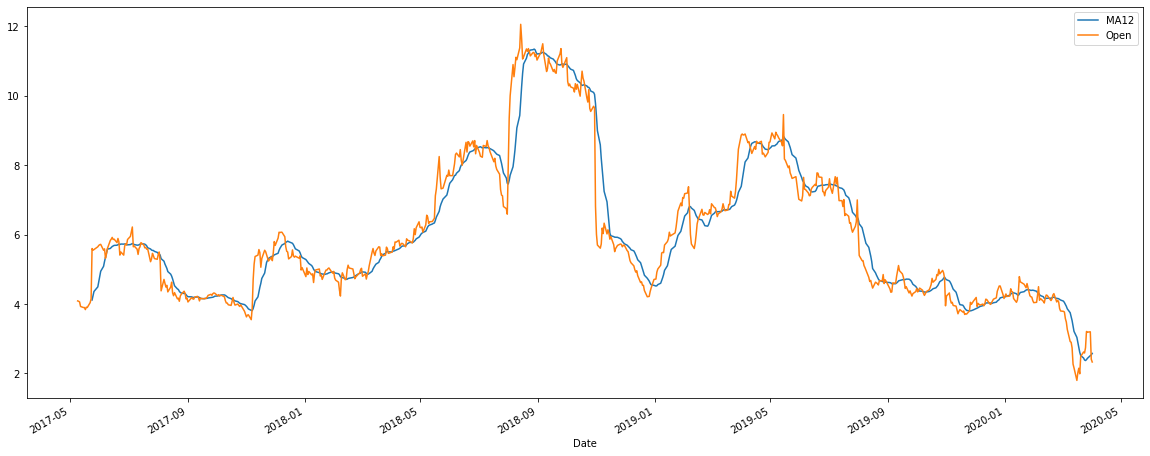

In [137]:
microsoft_lat['MA12'] = microsoft_lat['Open'].rolling(12).mean()
microsoft_lat['MA12'].plot(label='MA12',figsize=(20,8))
microsoft_lat['Open'].plot()
plt.legend(loc="best")
plt.show()

In [138]:
microsoft_train, microsoft_test = train_test_split(microsoft, train_size = 0.7, random_state = 42)

In [140]:
train_len2 =1129 

In [194]:
y_hat_sma = microsoft.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = microsoft['Open'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len2:] = y_hat_sma['sma_forecast'][train_len2-1]

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/110531510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len2:] = y_hat_sma['sma_forecast'][train_len2-1]


In [143]:
rmse_microsoft =  np.sqrt(mean_squared_error(microsoft_test['Open'], y_hat_sma['sma_forecast'][train_len2:])).round(2)
mape_microsoft = np.round(np.mean(np.abs(microsoft_test['Open']-y_hat_sma['sma_forecast'][train_len2:])/microsoft_test['Open'])*100,2)

results_02 = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse_microsoft],'MAPE': [mape_microsoft] })
results_02 = results_02[['Method', 'RMSE', 'MAPE']]
results_02

,Method,RMSE,MAPE
0,Simple moving average forecast,11.16,32.85


In [144]:
model = ExponentialSmoothing(np.asarray(microsoft_train['average']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = microsoft_test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(microsoft_test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 4.1, 'initial_trend': 6.82, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/1769719736.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


In [145]:
rmse_microsoft = np.sqrt(mean_squared_error(microsoft_test['average'], y_hat_holt['holt_forecast'])).round(2)
mape_microsoft = np.round(np.mean(np.abs(microsoft_test['average']-y_hat_holt['holt_forecast'])/microsoft_test['average'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse_microsoft],'MAPE': [mape_microsoft] })
results_02 = pd.concat([results_02, tempResults])
results_02 = results_02[['Method', 'RMSE', 'MAPE']]
results_02

,Method,RMSE,MAPE
0,Simple moving average forecast,11.16,32.85
0,Holt's exponential smoothing method,16.86,123.83


In [207]:
y_hat_hwa = microsoft_test.copy()
model = ExponentialSmoothing(np.asarray(microsoft_train['Open']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(485)

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.01845884304261434, 'smoothing_trend': 0.003354092676797382, 'smoothing_seasonal': 0.034629537461150724, 'damping_trend': nan, 'initial_level': 13.904015441321656, 'initial_trend': 0.006317101043237834, 'initial_seasons': array([-4.26091704, -5.0913774 , -5.32884791, -5.07589648, -6.47747791,
       -2.47355183, -4.21071884, -2.67718932, -1.81635885, -3.95279086,
       -5.15733385, -2.37758506]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [148]:
rmse_microsoft = np.sqrt(mean_squared_error(microsoft_test['Open'], y_hat_hwa['hw_forecast'])).round(2)
mape_microsoft = np.round(np.mean(np.abs(microsoft_test['Open']-y_hat_hwa['hw_forecast'])/microsoft_test['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse_microsoft],'MAPE': [mape_microsoft] })
results_02 = pd.concat([results_02, tempResults])
results_02 = results_02[['Method', 'RMSE', 'MAPE']]
results_02

,Method,RMSE,MAPE
0,Simple moving average forecast,11.16,32.85
0,Holt's exponential smoothing method,16.86,123.83
0,Holt Winters' additive method,9.55,81.51


let us calculate the cumulative return of microsoft

In [149]:
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1))-1

In [150]:
microsoft['cumulative return'] = (1+microsoft['returns']).cumprod()

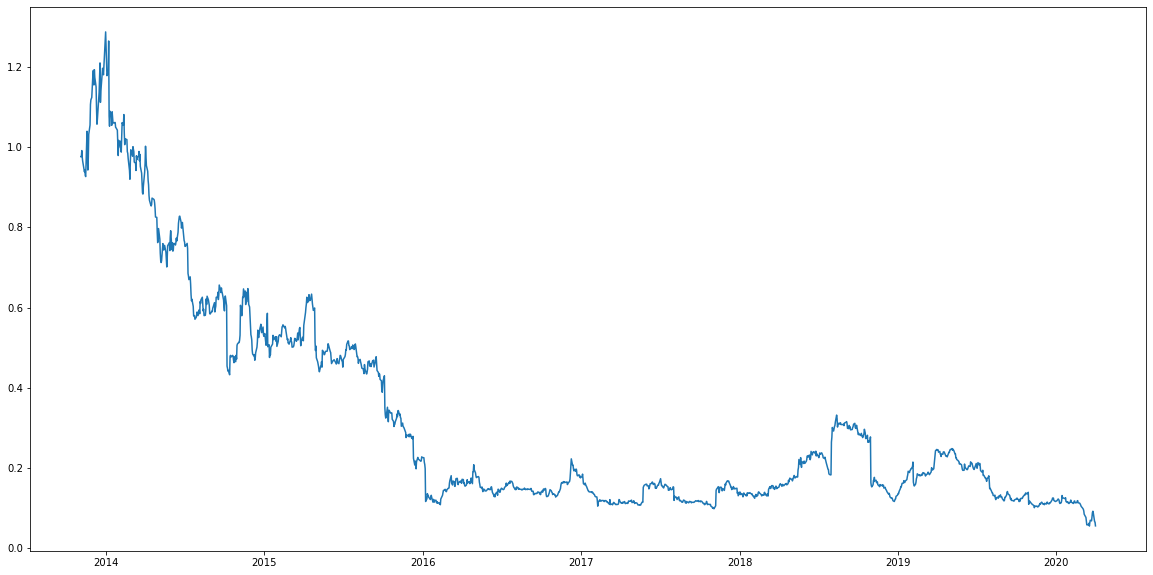

In [151]:
plt.figure(figsize=(20,10))
plt.plot(microsoft['cumulative return'])
plt.show()

#### Tesla forcasting 

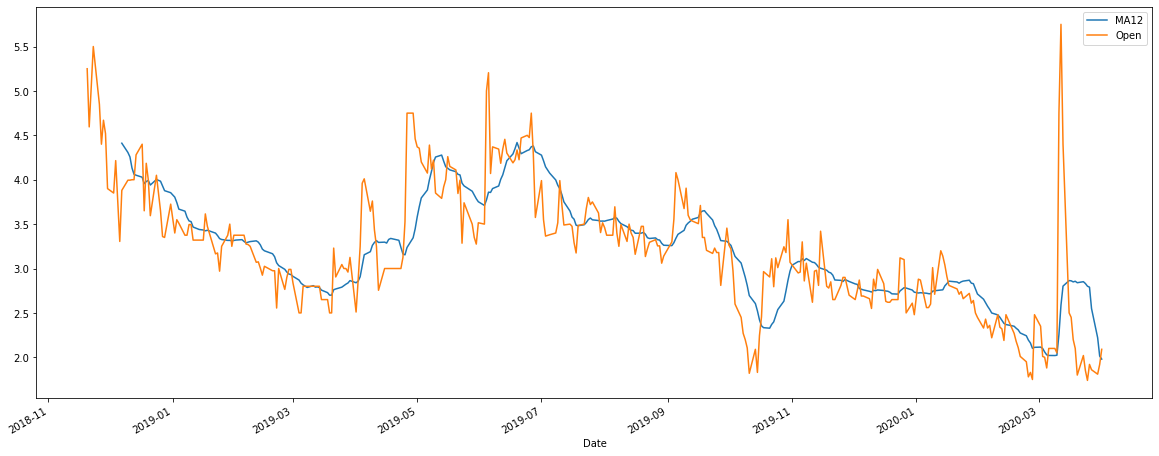

In [152]:
# As we have last 2 years tesla entries so we will use the full dataset
tesla['MA12'] = tesla['Open'].rolling(12).mean()
tesla['MA12'].plot(label='MA12',figsize=(20,8))
tesla['Open'].plot()
plt.legend(loc="best")
plt.show()

In [153]:
tesla_train, tesla_test = train_test_split(tesla, train_size = 0.7, random_state = 42)

In [203]:
tesla_train.shape

(239, 10)

In [205]:
tesla_test.shape

(103, 10)

In [212]:
train_len3 = 239

In [201]:
model = ExponentialSmoothing(np.asarray(tesla_train['average']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = tesla_test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(tesla_test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 3.548, 'initial_trend': -0.8380000000000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/1588238205.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


In [210]:
rmse_tesla = np.sqrt(mean_squared_error(tesla_test['average'], y_hat_holt['holt_forecast'])).round(2)
mape_tesla = np.round(np.mean(np.abs(tesla_test['average']-y_hat_holt['holt_forecast'])/tesla_test['average'])*100,2)

results_03 = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse_tesla],'MAPE': [mape_tesla] })
results_03 = results_03[['Method', 'RMSE', 'MAPE']]
results_03

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,4.59,128.17


In [209]:
y_hat_hwa = tesla_test.copy()
model = ExponentialSmoothing(np.asarray(tesla_train['Open']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(103)

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 4.212285655661449e-09, 'smoothing_seasonal': 1.3411813100504464e-09, 'damping_trend': nan, 'initial_level': 2.7707568906024522, 'initial_trend': -0.0004747337155477731, 'initial_seasons': array([0.51408841, 0.1713117 , 0.45104066, 0.56050934, 0.38623174,
       0.80921401, 0.34068552, 0.59640502, 0.5286412 , 0.53261272,
       0.4568319 , 0.40989439]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [211]:
rmse_tesla = np.sqrt(mean_squared_error(tesla_test['Open'], y_hat_hwa['hw_forecast'])).round(2)
mape_tesla = np.round(np.mean(np.abs(tesla_test['Open']-y_hat_hwa['hw_forecast'])/tesla_test['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse_tesla],'MAPE': [mape_tesla] })
results_03 = pd.concat([results_03, tempResults])
results_03 = results_03[['Method', 'RMSE', 'MAPE']]
results_03

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,4.59,128.17
0,Holt Winters' additive method,0.80,19.65


In [213]:
y_hat_sma = tesla.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = tesla['Open'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len3:] = y_hat_sma['sma_forecast'][train_len3-1]

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/2457670435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len3:] = y_hat_sma['sma_forecast'][train_len3-1]


In [214]:
rmse_tesla =  np.sqrt(mean_squared_error(tesla_test['Open'], y_hat_sma['sma_forecast'][train_len3:])).round(2)
mape_tesla = np.round(np.mean(np.abs(tesla_test['Open']-y_hat_sma['sma_forecast'][train_len3:])/tesla_test['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse_tesla],'MAPE': [mape_tesla] })
results_03 = pd.concat([results_03, tempResults])
results_03 = results_03[['Method', 'RMSE', 'MAPE']]
results_03

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,4.59,128.17
0,Holt Winters' additive method,0.80,19.65
0,Simple moving average forecast,0.78,26.56


let us calculate the cumulative return of tesla

In [215]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1

In [216]:
tesla['cumulative return'] = (1+tesla['returns']).cumprod()

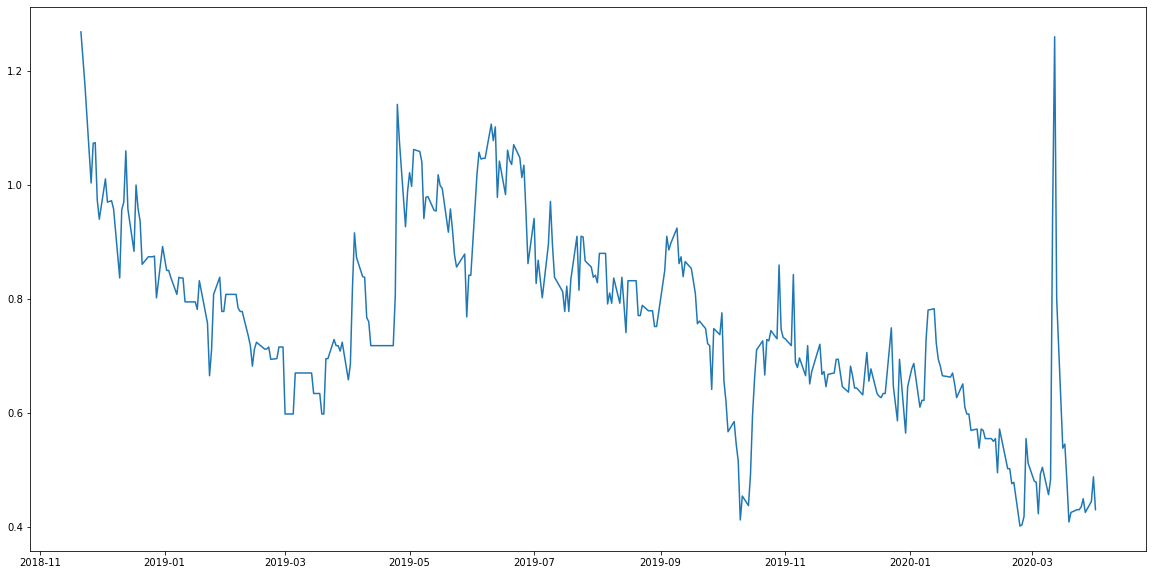

In [217]:
plt.figure(figsize=(20,10))
plt.plot(tesla['cumulative return'])
plt.show()

#### Walmart Forcasting

In [187]:
#For walmart we will use the recent 2 years prior values for forcasting 
walmart_lat = walmart.tail(730)
walmart_lat.shape

(730, 9)

C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/90533741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_lat['MA12'] = walmart_lat['Open'].rolling(12).mean()


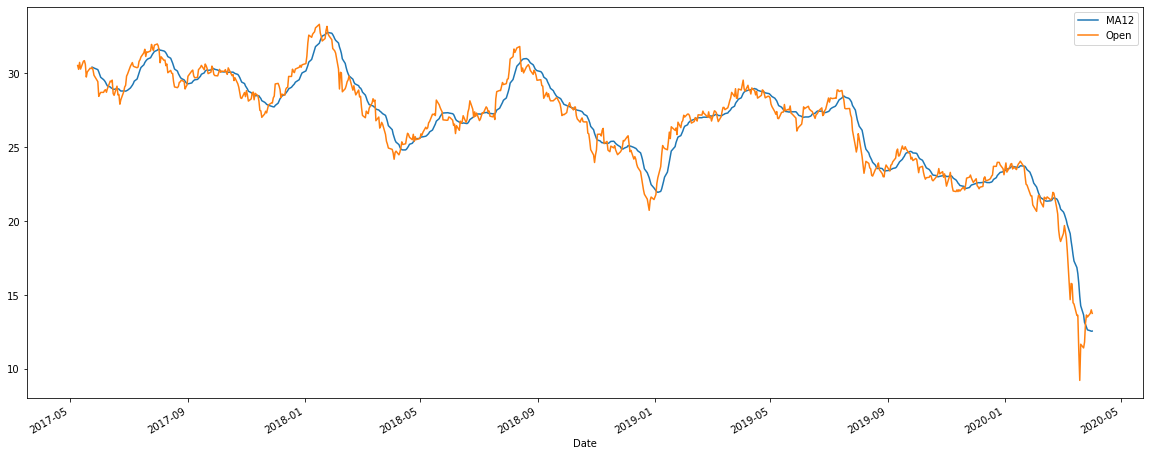

In [188]:
walmart_lat['MA12'] = walmart_lat['Open'].rolling(12).mean()
walmart_lat['MA12'].plot(label='MA12',figsize=(20,8))
walmart_lat['Open'].plot()
plt.legend(loc="best")
plt.show()

In [189]:
walmart_train, walmart_test = train_test_split(walmart, train_size = 0.7, random_state = 42)

In [224]:
walmart_test.shape

(2894, 9)

In [219]:
train_len4 = 6752

In [220]:
y_hat_sma = walmart.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = walmart['Open'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len4:] = y_hat_sma['sma_forecast'][train_len4-1]

In [193]:
y_hat_sma.shape

(9646, 10)

In [221]:
rmse_walmart =  np.sqrt(mean_squared_error(walmart_test['Open'], y_hat_sma['sma_forecast'][train_len4:])).round(2)
mape_walmart = np.round(np.mean(np.abs(walmart_test['Open']-y_hat_sma['sma_forecast'][train_len4:])/walmart_test['Open'])*100,2)

results_04 = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse_walmart],'MAPE': [mape_walmart] })
results_04 = results_04[['Method', 'RMSE', 'MAPE']]
results_04

,Method,RMSE,MAPE
0,Simple moving average forecast,13.57,35.43


In [222]:
model = ExponentialSmoothing(np.asarray(walmart_train['average']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = walmart_test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(walmart_test))

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\RUTVIK~1\AppData\Local\Temp/ipykernel_31436/1292041715.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 3.523, 'initial_trend': -0.17900000000000027, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [223]:
rmse_walmart = np.sqrt(mean_squared_error(walmart_test['average'], y_hat_holt['holt_forecast'])).round(2)
mape_walmart = np.round(np.mean(np.abs(walmart_test['average']-y_hat_holt['holt_forecast'])/walmart_test['average'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse_walmart],'MAPE': [mape_walmart] })
results_04 = pd.concat([results_04, tempResults])
results_04 = results_04[['Method', 'RMSE', 'MAPE']]
results_04

,Method,RMSE,MAPE
0,Simple moving average forecast,13.57,35.43
0,Holt's exponential smoothing method,94.70,1015.31


In [225]:
y_hat_hwa = walmart_test.copy()
model = ExponentialSmoothing(np.asarray(walmart_train['Open']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(2894)

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.021011802365206528, 'smoothing_trend': 0.010127268858809657, 'smoothing_seasonal': 0.0409481629385928, 'damping_trend': nan, 'initial_level': 17.16763386661301, 'initial_trend': 0.0432847840677141, 'initial_seasons': array([-2.84098163, -2.61779539, -0.39924755, -5.50068412, -2.10571946,
       -0.6448398 , -0.49523277, -3.43560166, -3.36873038, -4.14628168,
       -0.68791018, -6.00867407]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [226]:
rmse_walmart = np.sqrt(mean_squared_error(walmart_test['Open'], y_hat_hwa['hw_forecast'])).round(2)
mape_walmart = np.round(np.mean(np.abs(walmart_test['Open']-y_hat_hwa['hw_forecast'])/walmart_test['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse_walmart],'MAPE': [mape_walmart] })
results_04 = pd.concat([results_04, tempResults])
results_04 = results_04[['Method', 'RMSE', 'MAPE']]
results_04

,Method,RMSE,MAPE
0,Simple moving average forecast,13.57,35.43
0,Holt's exponential smoothing method,94.70,1015.31
0,Holt Winters' additive method,22.85,146.82


lets calculate the cumulative return of walmart

In [227]:
walmart['returns'] = (walmart['Close']/walmart['Close'].shift(1))-1

In [228]:
walmart['cumulative return'] = (1+walmart['returns']).cumprod()

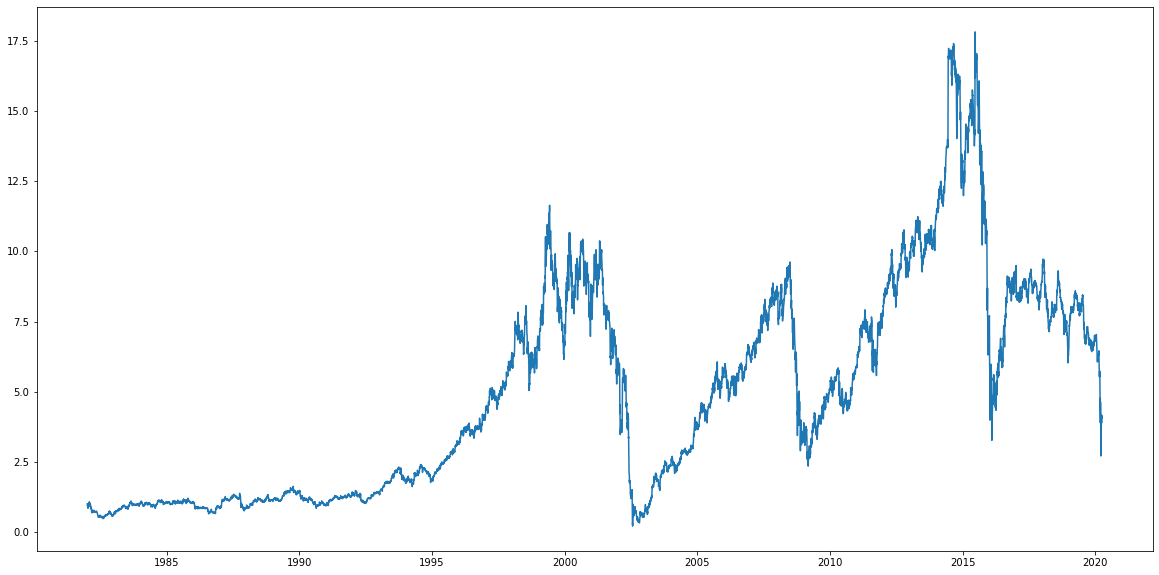

In [229]:
plt.figure(figsize=(20,10))
plt.plot(walmart['cumulative return'])
plt.show()

#### Since we are done with our prediction , we will now conclude this forcasting case study

### Result 

In [231]:
apple_score = results_01.copy()
microsoft_score = results_02.copy()
tesla_score = results_03.copy()
walmart_score = results_04.copy()

In [232]:
print(apple_score)
print(microsoft_score)
print(tesla_score)
print(walmart_score)

                                Method    RMSE      MAPE
0       Simple moving average forecast   58.38     65.91
0  Holt's exponential smoothing method  427.14  25720.96
0        Holt Winters' additive method  362.38  21268.74
                                Method   RMSE    MAPE
0       Simple moving average forecast  11.16   32.85
0  Holt's exponential smoothing method  16.86  123.83
0        Holt Winters' additive method   9.55   81.51
                                Method  RMSE    MAPE
0  Holt's exponential smoothing method  4.59  128.17
0        Holt Winters' additive method  0.80   19.65
0       Simple moving average forecast  0.78   26.56
                                Method   RMSE     MAPE
0       Simple moving average forecast  13.57    35.43
0  Holt's exponential smoothing method  94.70  1015.31
0        Holt Winters' additive method  22.85   146.82


#### Looking to the above results of stock forecast we can see that in TESLA result the RMSE and MAPE values are under conditions , the Mean absolute percentage error is less so we can say that the percentage variation in stock for the next day would be low .And the Root mean square error is low soo our model is well optimized 

In [238]:
tesla_score

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,4.59,128.17
0,Holt Winters' additive method,0.80,19.65
0,Simple moving average forecast,0.78,26.56


In [240]:
tesla["cumulative return"].describe()

count    341.000000
mean       0.760999
std        0.168715
min        0.402395
25%        0.658683
50%        0.749701
75%        0.862275
max        1.268263
Name: cumulative return, dtype: float64

### Thank You 